In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

from scipy.optimize import curve_fit
from tqdm.auto import trange
from tqdm import tqdm
import Metropolis_Algorithm as MA

import importlib

importlib.reload(MA)

# Setting Constants
x_0 = 0
y_0 = 0
t_i = 0
t_f = 8

mass = 1
steps = 150  # Reduced from 800 - fewer points to update
numb_paths = 1000

times = np.linspace(t_i, t_f, steps)
dt = times[1] - times[0]

In [3]:
# Potential
def x_potential(x):
    return 1 / 2 * x ** 2


def y_potential(x):
    return 1000 * x ** 4


def ho_analytic_pdf(x):
    return (1 / np.sqrt(np.pi)) * np.exp(-x ** 2)


def residual_calculator(x_values, model, model_parameters, y_values, y_errors):
    theoretical_values = model(x_values, *model_parameters)
    residuals = (y_values - theoretical_values) / y_errors
    return residuals

In [77]:
paths_x = np.array([
    MA.Pos_Gen(0.0, 0.0, steps, dt)
    for _ in range(numb_paths)
])

paths_orig = paths_x.copy()

Thermalizing...


Thermalising:  28%|██▊       | 142/500 [00:00<00:00, 735.94it/s]

Endpoint acceptance ≈ 0.543
Endpoint acceptance ≈ 0.528


Thermalising:  69%|██████▉   | 347/500 [00:00<00:00, 778.98it/s]

Endpoint acceptance ≈ 0.537
Endpoint acceptance ≈ 0.518


Thermalising: 100%|██████████| 500/500 [00:00<00:00, 722.16it/s]


Endpoint acceptance ≈ 0.513

Sampling...


Sampling:   1%|          | 42/5000 [00:00<00:06, 784.85it/s]

Endpoint acceptance ≈ 0.555


Sampling:   3%|▎         | 149/5000 [00:00<00:07, 672.65it/s]

Endpoint acceptance ≈ 0.519


Sampling:   5%|▍         | 247/5000 [00:00<00:06, 768.02it/s]

Endpoint acceptance ≈ 0.524


Sampling:   7%|▋         | 346/5000 [00:00<00:06, 766.31it/s]

Endpoint acceptance ≈ 0.502


Sampling:   9%|▉         | 439/5000 [00:00<00:06, 701.75it/s]

Endpoint acceptance ≈ 0.537


Sampling:  11%|█         | 537/5000 [00:00<00:06, 686.97it/s]

Endpoint acceptance ≈ 0.539


Sampling:  13%|█▎        | 637/5000 [00:00<00:06, 679.15it/s]

Endpoint acceptance ≈ 0.512


Sampling:  15%|█▍        | 741/5000 [00:01<00:05, 724.76it/s]

Endpoint acceptance ≈ 0.508


Sampling:  17%|█▋        | 848/5000 [00:01<00:05, 773.61it/s]

Endpoint acceptance ≈ 0.534


Sampling:  19%|█▉        | 947/5000 [00:01<00:05, 734.72it/s]

Endpoint acceptance ≈ 0.520


Sampling:  21%|██        | 1046/5000 [00:01<00:06, 640.66it/s]

Endpoint acceptance ≈ 0.502


Sampling:  23%|██▎       | 1142/5000 [00:01<00:05, 720.91it/s]

Endpoint acceptance ≈ 0.531


Sampling:  25%|██▍       | 1240/5000 [00:01<00:05, 698.68it/s]

Endpoint acceptance ≈ 0.569


Sampling:  27%|██▋       | 1339/5000 [00:01<00:04, 737.81it/s]

Endpoint acceptance ≈ 0.530


Sampling:  29%|██▉       | 1442/5000 [00:02<00:04, 733.43it/s]

Endpoint acceptance ≈ 0.503


Sampling:  31%|███       | 1548/5000 [00:02<00:04, 739.91it/s]

Endpoint acceptance ≈ 0.507


Sampling:  33%|███▎      | 1649/5000 [00:02<00:04, 785.99it/s]

Endpoint acceptance ≈ 0.526


Sampling:  35%|███▌      | 1750/5000 [00:02<00:04, 755.87it/s]

Endpoint acceptance ≈ 0.503


Sampling:  37%|███▋      | 1844/5000 [00:02<00:04, 650.17it/s]

Endpoint acceptance ≈ 0.501


Sampling:  39%|███▊      | 1937/5000 [00:02<00:04, 732.15it/s]

Endpoint acceptance ≈ 0.561


Sampling:  41%|████      | 2038/5000 [00:02<00:04, 708.79it/s]

Endpoint acceptance ≈ 0.531


Sampling:  43%|████▎     | 2142/5000 [00:03<00:03, 773.17it/s]

Endpoint acceptance ≈ 0.507


Sampling:  45%|████▍     | 2247/5000 [00:03<00:03, 778.97it/s]

Endpoint acceptance ≈ 0.534


Sampling:  47%|████▋     | 2348/5000 [00:03<00:03, 732.54it/s]

Endpoint acceptance ≈ 0.502


Sampling:  49%|████▉     | 2449/5000 [00:03<00:03, 792.25it/s]

Endpoint acceptance ≈ 0.530


Sampling:  51%|█████     | 2551/5000 [00:03<00:03, 796.06it/s]

Endpoint acceptance ≈ 0.537


Sampling:  53%|█████▎    | 2649/5000 [00:03<00:03, 722.77it/s]

Endpoint acceptance ≈ 0.555


Sampling:  55%|█████▍    | 2742/5000 [00:03<00:02, 819.28it/s]

Endpoint acceptance ≈ 0.519


Sampling:  57%|█████▋    | 2845/5000 [00:03<00:02, 721.02it/s]

Endpoint acceptance ≈ 0.550


Sampling:  59%|█████▊    | 2937/5000 [00:04<00:03, 655.60it/s]

Endpoint acceptance ≈ 0.505


Sampling:  61%|██████    | 3038/5000 [00:04<00:03, 640.80it/s]

Endpoint acceptance ≈ 0.528


Sampling:  63%|██████▎   | 3139/5000 [00:04<00:02, 694.36it/s]

Endpoint acceptance ≈ 0.537


Sampling:  65%|██████▍   | 3241/5000 [00:04<00:02, 685.47it/s]

Endpoint acceptance ≈ 0.515


Sampling:  67%|██████▋   | 3340/5000 [00:04<00:02, 725.48it/s]

Endpoint acceptance ≈ 0.517


Sampling:  69%|██████▉   | 3441/5000 [00:04<00:02, 723.42it/s]

Endpoint acceptance ≈ 0.556


Sampling:  71%|███████   | 3540/5000 [00:04<00:02, 685.55it/s]

Endpoint acceptance ≈ 0.495


Sampling:  73%|███████▎  | 3646/5000 [00:05<00:01, 785.33it/s]

Endpoint acceptance ≈ 0.512


Sampling:  75%|███████▍  | 3747/5000 [00:05<00:01, 752.67it/s]

Endpoint acceptance ≈ 0.539


Sampling:  77%|███████▋  | 3848/5000 [00:05<00:01, 728.97it/s]

Endpoint acceptance ≈ 0.540


Sampling:  79%|███████▉  | 3949/5000 [00:05<00:01, 758.62it/s]

Endpoint acceptance ≈ 0.534


Sampling:  81%|████████  | 4049/5000 [00:05<00:01, 756.25it/s]

Endpoint acceptance ≈ 0.526


Sampling:  83%|████████▎ | 4148/5000 [00:05<00:01, 732.91it/s]

Endpoint acceptance ≈ 0.545


Sampling:  85%|████████▍ | 4249/5000 [00:05<00:01, 708.65it/s]

Endpoint acceptance ≈ 0.535


Sampling:  87%|████████▋ | 4349/5000 [00:06<00:00, 789.71it/s]

Endpoint acceptance ≈ 0.528


Sampling:  89%|████████▉ | 4449/5000 [00:06<00:00, 781.05it/s]

Endpoint acceptance ≈ 0.529


Sampling:  91%|█████████ | 4548/5000 [00:06<00:00, 743.01it/s]

Endpoint acceptance ≈ 0.505


Sampling:  93%|█████████▎| 4650/5000 [00:06<00:00, 787.99it/s]

Endpoint acceptance ≈ 0.499


Sampling:  95%|█████████▍| 4748/5000 [00:06<00:00, 737.73it/s]

Endpoint acceptance ≈ 0.506


Sampling:  97%|█████████▋| 4847/5000 [00:06<00:00, 759.30it/s]

Endpoint acceptance ≈ 0.524


Sampling:  99%|█████████▉| 4948/5000 [00:06<00:00, 755.85it/s]

Endpoint acceptance ≈ 0.533


Sampling: 100%|██████████| 5000/5000 [00:06<00:00, 718.55it/s]



------ Results ------
Numerical PDF area: 1.00000
Analytic PDF area: 1.00000
Standard deviation: 0.7019 (expected ≈ 0.707)
Root mean square: 0.7022 (expected ≈ 0.707)


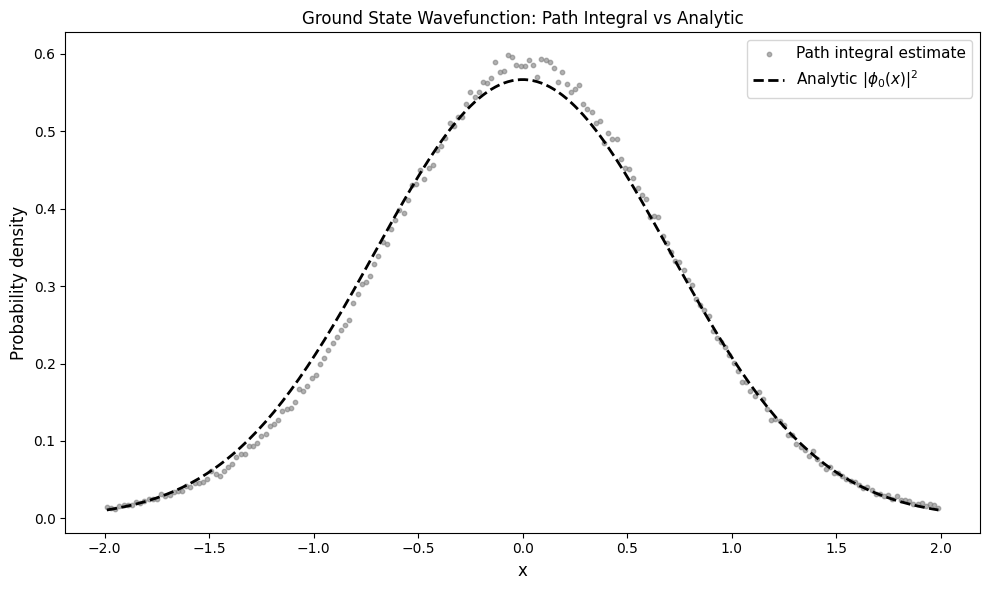

In [78]:
C = 1.8437008005694266
mid = paths_x.shape[1] // 2
thin = 10
sigma_prop = C * np.sqrt(dt)

# Thermalization
print("Thermalizing...")
for sweep in trange(500, desc="Thermalising", mininterval=0):
    acceptances, endpoint_accept = MA.metropolis_sweep_vectorised(
        paths_x, times, mass, x_potential, sigma_prop
    )

    if sweep % 100 == 0:
        tqdm.write(f"Endpoint acceptance ≈ {endpoint_accept:.3f}")

# Sampling
print("\nSampling...")
samples_x = []

for k in trange(5000, desc="Sampling", mininterval=0):
    acceptances, endpoint_accept = MA.metropolis_sweep_vectorised(
        paths_x, times, mass, x_potential, sigma_prop
    )

    if k % 100 == 0:
        tqdm.write(f"Endpoint acceptance ≈ {endpoint_accept:.3f}")

    if k % thin == 0:
        samples_x.append(paths_x[:, -1].copy())

samples_x = np.concatenate(samples_x)

# Compute PDF
x_bins = np.linspace(-2, 2, 201)
pdf_unnormalised_x, bin_edges_x = np.histogram(samples_x, bins=x_bins)

x_centres = 0.5 * (bin_edges_x[1:] + bin_edges_x[:-1])
dx = np.diff(x_bins)[0]

pdf_x = pdf_unnormalised_x / np.sum(pdf_unnormalised_x * dx)

# Analytic PDF
phi_sq_analytic_x = (1 / np.sqrt(np.pi)) * np.exp(-x_centres ** 2)
phi_sq_analytic_x /= np.sum(phi_sq_analytic_x * dx)

# Statistics
mean_square_x = np.mean(samples_x**2)
rms = np.sqrt(mean_square_x)
std = np.std(samples_x)

print("\n------ Results ------")
print(f"Numerical PDF area: {np.sum(pdf_x * dx):.5f}")
print(f"Analytic PDF area: {np.sum(phi_sq_analytic_x * dx):.5f}")
print(f"Standard deviation: {std:.4f} (expected ≈ 0.707)")
print(f"Root mean square: {rms:.4f} (expected ≈ 0.707)")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x_centres, pdf_x, label='Path integral estimate', s=10, alpha=0.6, color = 'grey')
plt.plot(x_centres, phi_sq_analytic_x, 'black',linestyle = '--', linewidth=2, label=r'Analytic $|\phi_0(x)|^2$')
plt.xlabel('x', fontsize=12)
plt.ylabel('Probability density', fontsize=12)
plt.legend(fontsize=11)
plt.title('Ground State Wavefunction: Path Integral vs Analytic')

plt.tight_layout()
plt.show()

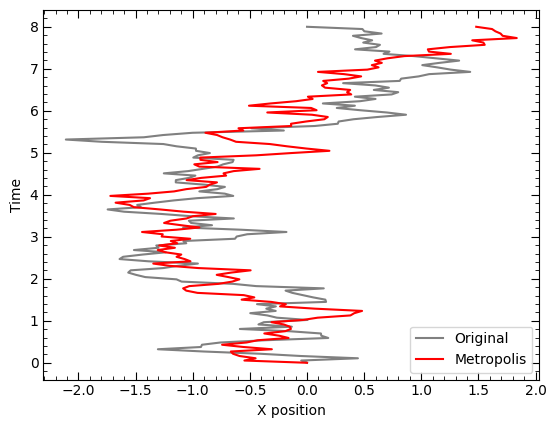

In [64]:
pc_savepath_paths_fig = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\Paths.svg"

plt.figure(1)

plt.plot(paths_orig[3],times, color = 'grey', label = "Original")
plt.plot(paths_x[3],times, color = 'red',label = "Metropolis")

plt.minorticks_on()
plt.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
plt.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')

plt.xlabel('X position')
plt.ylabel('Time')
plt.legend(loc = "lower right")


plt.savefig(pc_savepath_paths_fig, bbox_inches='tight')

plt.show()

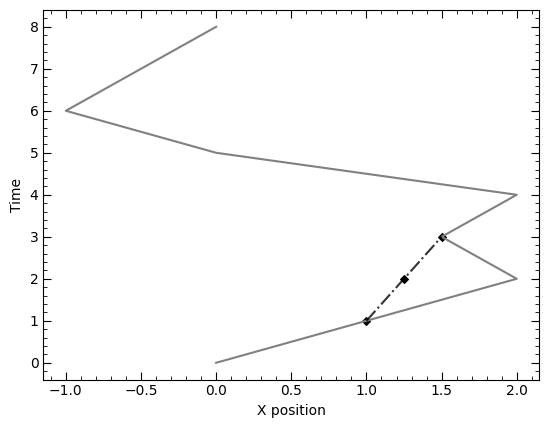

In [66]:
x_position_orig = [0,1,2,1.5,2,0,-1,-0.5,0]
x_position_new = [1,1.25,1.5]
time = [0,1,2,3,4,5,6,7,8]
time_change = [1,2,3]

pc_savepath_delta_S = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\delta_S.svg"
plt.figure(1)

plt.minorticks_on()
plt.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
plt.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')

plt.plot(x_position_orig, time, label = "original", color = 'grey')
plt.plot(x_position_new, time_change, linestyle = "-.",label = "Change", color = "black", alpha = 0.8)
plt.scatter(x_position_new, time_change, color = "black", s = 15, marker = "D")

plt.xlabel('X position')
plt.ylabel('Time')

plt.savefig(pc_savepath_delta_S, bbox_inches='tight')
plt.show()

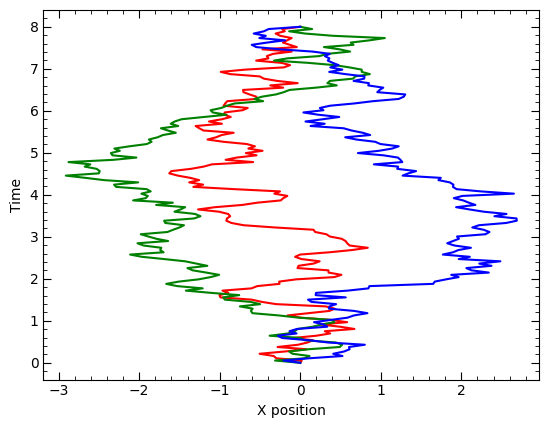

In [73]:
pc_savepath_bridge = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\bridge.svg"

colors = ['red', 'green', 'blue']

plt.figure(1)

plt.minorticks_on()
plt.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
plt.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')

for i in range (3):
    plt.plot(paths_orig[i+20], times, colors[i])


plt.xlabel('X position')
plt.ylabel('Time')

plt.savefig(pc_savepath_bridge, bbox_inches='tight')
plt.show()